<h1 style="text-align: center; color: #008080; background-color: #e0ffff; font-family: 'Times New Roman', Times, serif;">Import Libraries</h1>


In [1]:
import requests
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns


<p style="text-align: center; background-color: #ffcc99; color: #000080; font-size: 20px;">Download the image predection file</p>


In [2]:
def download_file(url, filename):
    response = requests.get(url)
    response.raise_for_status()
    
    with open(filename, 'wb') as file:
        file.write(response.content)
    print(f"Downloaded {filename}")

In [3]:
image_predictions_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
file_name = "image-predictions.tsv"
download_file(image_predictions_url, file_name)

Downloaded image-predictions.tsv


<p style="text-align: center; color: #008080; background-color: #e0ffff; font-family: Arial, Helvetica, sans-serif;">Initalize Data Frames</p>


In [4]:
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
image_predictions = pd.read_csv("image-predictions.tsv", sep="\t")
tweet_json = pd.read_json("tweet-json.txt", lines=True)

## Assessing Data ``` Twitter Archive ```

In [5]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [6]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

### A Quality Issue
The timestamp column need to be converted to a data time type.

In [7]:
twitter_archive.shape

(2356, 17)

In [8]:
twitter_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                           745
doggo                         2259
floofer                       2346
pupper                        2099
puppo                         2326
dtype: int64

#### A Quality Issue
About half of the columns has more than 2000 NaNs in their rows

In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [10]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [12]:
 twitter_archive["name"].value_counts()

name
a               55
Charlie         12
Oliver          11
Cooper          11
Lucy            11
                ..
Jaycob           1
Jeremy           1
Chaz             1
Skittles         1
Cleopatricia     1
Name: count, Length: 956, dtype: int64

There are many false names in the column


In [13]:
twitter_archive["timestamp"]

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
                  ...            
2351    2015-11-16 00:24:50 +0000
2352    2015-11-16 00:04:52 +0000
2353    2015-11-15 23:21:54 +0000
2354    2015-11-15 23:05:30 +0000
2355    2015-11-15 22:32:08 +0000
Name: timestamp, Length: 2356, dtype: object

In [14]:
twitter_archive["expanded_urls"]

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
                              ...                        
2351    https://twitter.com/dog_rates/status/666049248...
2352    https://twitter.com/dog_rates/status/666044226...
2353    https://twitter.com/dog_rates/status/666033412...
2354    https://twitter.com/dog_rates/status/666029285...
2355    https://twitter.com/dog_rates/status/666020888...
Name: expanded_urls, Length: 2356, dtype: object

In [15]:
twitter_archive["expanded_urls"].duplicated().sum()

np.int64(137)

there are some duplicates here

In [16]:
twitter_archive[["rating_denominator","rating_numerator"]].describe()

,rating_denominator,rating_numerator
count,2356.000000,2356.000000
mean,10.455433,13.126486
std,6.745237,45.876648
min,0.000000,0.000000
25%,10.000000,10.000000
50%,10.000000,11.000000
75%,10.000000,12.000000
max,170.000000,1776.000000


Unrealistic values apear here

In [17]:
twitter_archive[twitter_archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [18]:
twitter_archive.loc[twitter_archive["expanded_urls"].isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,NaN,NaN,NaN,NaN,NaN
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,NaN,NaN,NaN,NaN,NaN
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,NaN,NaN,NaN,NaN,NaN
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,NaN,NaN,NaN,NaN,NaN
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,NaN,NaN,NaN,NaN,NaN
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,NaN,NaN,NaN,NaN,NaN
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,NaN,NaN,NaN,NaN,NaN
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,NaN,NaN,NaN,NaN,NaN
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,NaN,NaN,NaN,NaN,NaN
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,NaN,NaN,NaN,NaN,NaN


## Assesing the ``` Image Predections ``` Table

In [19]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [20]:
image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [21]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
image_predictions.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [23]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
image_predictions.loc[image_predictions["jpg_url"].str[-3:] != "jpg"]


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
320,671789708968640512,https://pbs.twimg.com/tweet_video_thumb/CVKtH-...,1,dalmatian,0.114259,True,teddy,0.062275,False,steam_locomotive,0.049700,False
815,692752401762250755,https://pbs.twimg.com/tweet_video_thumb/CZ0mhd...,1,Samoyed,0.471276,True,Siberian_husky,0.158850,True,Eskimo_dog,0.138672,True


There are 2 images that arn't a jpg file , they are png

In [25]:
image_predictions["jpg_url"].duplicated().sum()

np.int64(66)

there are some duplicate images

## Assesing the ``` Extra Archive ``` Table

In [26]:
tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [27]:
image_predictions.loc[image_predictions["img_num"] > 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False
312,671547767500775424,https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg,2,Loafer,0.255088,False,platypus,0.090019,False,cowboy_boot,0.066536,False
315,671735591348891648,https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg,2,stone_wall,0.271121,False,Irish_wolfhound,0.063078,True,poncho,0.048226,False
319,671768281401958400,https://pbs.twimg.com/media/CVKZsHtWwAA6gPj.jpg,2,Chihuahua,0.500373,True,French_bulldog,0.112796,True,Italian_greyhound,0.062893,True
345,672272411274932228,https://pbs.twimg.com/media/CVRkLuJWUAAhhYp.jpg,2,pug,0.914685,True,Norwegian_elkhound,0.014982,True,Siamese_cat,0.009221,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True


In [28]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [29]:

def nan_summary(df):
    # Calculate the sum of NaNs in each column
    nan_sum = df.isna().sum()
    
    # Calculate the percentage of NaNs in each column
    nan_percentage = (df.isna().sum() / len(df)) * 100
    
    # Filter out columns with zero NaNs
    nan_sum = nan_sum[nan_sum > 0]
    nan_percentage = nan_percentage[nan_percentage > 0]
    
    # Combine the sums and percentages into a DataFrame for easier sorting
    nan_df = pd.DataFrame({
        'Sum': nan_sum,
        'Percentage': nan_percentage
    })
    
    # Sort by the sum of NaNs in descending order
    nan_df = nan_df.sort_values(by='Sum', ascending=False)
    
    # Determine the maximum length of column names for formatting
    max_col_name_length = max(len(col) for col in nan_df.index)
    
    # Display the results
    for column in nan_df.index:
        print(f"Column '{column}':".ljust(max_col_name_length + 10) + f"{nan_df.loc[column, 'Sum']} ({nan_df.loc[column, 'Percentage']:.2f}%)")


In [30]:
nan_summary(tweet_json)

Column 'geo':                          2354 (100.00%)
Column 'coordinates':                  2354 (100.00%)
Column 'contributors':                 2354 (100.00%)
Column 'place':                        2353 (99.96%)
Column 'quoted_status':                2326 (98.81%)
Column 'quoted_status_id':             2325 (98.77%)
Column 'quoted_status_id_str':         2325 (98.77%)
Column 'in_reply_to_status_id':        2276 (96.69%)
Column 'in_reply_to_status_id_str':    2276 (96.69%)
Column 'in_reply_to_user_id_str':      2276 (96.69%)
Column 'in_reply_to_user_id':          2276 (96.69%)
Column 'in_reply_to_screen_name':      2276 (96.69%)
Column 'retweeted_status':             2175 (92.40%)
Column 'extended_entities':            281 (11.94%)
Column 'possibly_sensitive_appealable':143 (6.07%)
Column 'possibly_sensitive':           143 (6.07%)


In [31]:
tweet_json.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [32]:
tweet_json["created_at"]

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2349   2015-11-16 00:24:50+00:00
2350   2015-11-16 00:04:52+00:00
2351   2015-11-15 23:21:54+00:00
2352   2015-11-15 23:05:30+00:00
2353   2015-11-15 22:32:08+00:00
Name: created_at, Length: 2354, dtype: datetime64[ns, UTC]

In [33]:
tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


### Quality Issues

1. **Accuracy**:
   - **Twitter Archive Table :**
   - The ``` name ``` column has wrong names like a
   - The ``` rating_numerator ``` and ``` rating_denominator ``` columns has unrealisitc values like : 0s

2. **Completeness**:
   - **Twitter Archive Table :**
   - There are 9 columns that has more than 2000 null values
   - **Extra Archive Table :**
   - There are 13 columns that has Null values with more than 90% of the colmun and there are 3 cols that 100% of it are NaNs 

3. **Consistency**:
   - The ``` expanded_urls ``` column has duplicate values.
   -
   - **Image Predictions Table**:
   - In the ``` jpg_url ``` column, There are 2 images that arn't a jpg file , they are png files
   - In the ``` jpg_url ``` column, There are some duplicates wich could lead to some confusion.

4. **Validity**:
   - **Twitter Archive Table :**
   - The ``` timestamp ``` isn't in the right format , It should be a datetime format
   - **Extra Archive Table :**
   - The ``` id_str ``` is in int format, It should be a string format

### Tidines Issues

1. **Twitter Archive Table :**
   - The columns [doggo, floofer, pupper, puppo] should be one column becasue they are type of dog.
2. **Extra Archive Table :**
   - Column names should be renamed to indecate the description of the values
   


## Phase three: Cleaning.


Copying DataFrame

In [34]:
twitter_archive_cleaned = twitter_archive.copy()
image_predictions_cleaned = image_predictions.copy()
tweet_json_cleaned = tweet_json.copy()

#### Clean ``` Twitter Archive ``` Table

#### Solving Quality Issues

### Define
The ``` name ``` column has wrong names like a 

### Code

In [35]:
twitter_archive_cleaned = twitter_archive_cleaned.loc[twitter_archive_cleaned["name"] != "a"]
twitter_archive_cleaned['name'].replace('None', 'No Name', inplace=True)

/tmp/ipykernel_13515/2136204776.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  twitter_archive_cleaned['name'].replace('None', 'No Name', inplace=True)


### Test

In [36]:
twitter_archive_cleaned['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles',
       'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance',
       'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti',
       'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter',
       'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean',
       'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey',
       'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili',
       'Sammy', 'Meatball', 'Paisley', 'Albus', 'Neptune', 'Quinn',


### Define
Merging (doggo, floofer, pupper, puppo) into one column that represents the type of the dog

### Code

In [37]:
twitter_archive_cleaned = pd.melt(
    twitter_archive_cleaned,
    id_vars=['tweet_id', 'timestamp', 'source', 'text','expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
    value_vars=['doggo', 'floofer', 'pupper', 'puppo'],
    var_name='type_of_dog',
    value_name='type'
)

In [38]:
twitter_archive_cleaned.loc[twitter_archive_cleaned['type'] == 'None', 'type'] = 'unspecified'
twitter_archive_cleaned['type_of_dog'] = twitter_archive_cleaned['type_of_dog']
twitter_archive_cleaned.drop('type', axis=1, inplace=True)


### Test

In [39]:
twitter_archive_cleaned.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type_of_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo


### Define
Dealing With unrealistic values in the rating_denominator & rating_numerator

### Code

In [40]:
twitter_archive_cleaned["rating_denominator"]

0       10
1       10
2       10
3       10
4       10
        ..
9199    10
9200    10
9201    10
9202    10
9203    10
Name: rating_denominator, Length: 9204, dtype: int64

In [41]:
twitter_archive_cleaned.loc[twitter_archive_cleaned["rating_denominator"] != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type_of_dog
312,835246439529840640,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960,0,NaN,doggo
341,832088576586297345,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,11,15,NaN,doggo
432,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,NaN,doggo
515,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,doggo
782,775096608509886464,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",https://twitter.com/dog_rates/status/740373189...,9,11,NaN,doggo
...,...,...,...,...,...,...,...,...,...
8550,682962037429899265,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,puppo
8551,682808988178739200,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I'm aware that I could've said 20/16, but here...",NaN,20,16,NaN,puppo
8666,677716515794329600,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,https://twitter.com/dog_rates/status/677716515...,144,120,NaN,puppo
8729,675853064436391936,2015-12-13 01:41:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an entire platoon of puppers. Tot...,https://twitter.com/dog_rates/status/675853064...,88,80,NaN,puppo


In [42]:
twitter_archive_cleaned = twitter_archive_cleaned.loc[twitter_archive_cleaned["rating_denominator"] == 10]

In [43]:
twitter_archive_cleaned.loc[twitter_archive_cleaned["rating_numerator"] > 20]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type_of_dog
187,855862651834028034,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,420,10,NaN,doggo
188,855860136149123072,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,666,10,NaN,doggo
289,838150277551247360,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,182,10,NaN,doggo
339,832215909146226688,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,doggo
693,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,doggo
761,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,doggo
976,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,doggo
1697,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,NaN,doggo
2047,670842764863651840,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420,10,NaN,doggo
2488,855862651834028034,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,420,10,NaN,floofer


In [44]:
twitter_archive_cleaned = twitter_archive_cleaned.loc[twitter_archive_cleaned["rating_numerator"] < 30]

### Test

In [45]:
twitter_archive_cleaned.describe()

,tweet_id,rating_numerator,rating_denominator
count,9.088000e+03,9088.000000,9088.0
mean,7.440569e+17,10.756602,10.0
std,6.864247e+16,2.211886,0.0
min,6.660209e+17,0.000000,10.0
25%,6.791560e+17,10.000000,10.0
50%,7.245887e+17,11.000000,10.0
75%,8.008566e+17,12.000000,10.0
max,8.924206e+17,27.000000,10.0


### Define
Dealing with the nans in the columns

### Code

In [46]:
nan_summary(twitter_archive_cleaned)

Column 'name':         2896 (31.87%)
Column 'expanded_urls':208 (2.29%)


In [47]:
# columns_to_drop = ["retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp","in_reply_to_user_id","in_reply_to_status_id"]

In [48]:
# twitter_archive_cleaned.drop(columns=columns_to_drop, inplace=True)

### Test

In [49]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9088 entries, 0 to 9203
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            9088 non-null   int64 
 1   timestamp           9088 non-null   object
 2   source              9088 non-null   object
 3   text                9088 non-null   object
 4   expanded_urls       8880 non-null   object
 5   rating_numerator    9088 non-null   int64 
 6   rating_denominator  9088 non-null   int64 
 7   name                6192 non-null   object
 8   type_of_dog         9088 non-null   object
dtypes: int64(3), object(6)
memory usage: 710.0+ KB


### Define 
Convert the timestamp to the right format

### Code

In [50]:
twitter_archive_cleaned["timestamp"] = pd.to_datetime(twitter_archive_cleaned["timestamp"])


### Test

In [51]:
twitter_archive_cleaned["timestamp"].describe()

count                                   9088
mean     2016-06-18 06:39:12.339788544+00:00
min                2015-11-15 22:32:08+00:00
25%                2015-12-22 04:26:16+00:00
50%         2016-04-25 13:19:45.500000+00:00
75%                2016-11-22 00:20:57+00:00
max                2017-08-01 16:23:56+00:00
Name: timestamp, dtype: object

### Define 
Removing duplicates in the expanded_urls

### Code

In [52]:
twitter_archive_cleaned[twitter_archive_cleaned.duplicated(subset="expanded_urls", keep=False)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type_of_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo
...,...,...,...,...,...,...,...,...,...
9199,666063827256086533,2015-11-16 01:22:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,https://twitter.com/dog_rates/status/666063827...,10,10,the,puppo
9200,666058600524156928,2015-11-16 01:01:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,8,10,the,puppo
9201,666051853826850816,2015-11-16 00:35:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2,10,an,puppo
9202,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,puppo


### Test

In [53]:
twitter_archive_cleaned["expanded_urls"].value_counts()

expanded_urls
https://www.gofundme.com/3ti3nps,https://twitter.com/dog_rates/status/868552278524837888/photo/1,https://twitter.com/dog_rates/status/868552278524837888/photo/1                                                                                                   8
https://www.loveyourmelon.com/pages/ourstory,https://twitter.com/dog_rates/status/820314633777061888/photo/1,https://twitter.com/dog_rates/status/820314633777061888/photo/1,https://twitter.com/dog_rates/status/820314633777061888/photo/1                       8
https://twitter.com/dog_rates/status/819227688460238848/photo/1                                                                                                                                                                                                    8
https://twitter.com/dog_rates/status/781524693396357120/photo/1                                                                                                                                            

In [54]:
twitter_archive_cleaned.drop_duplicates(subset='expanded_urls', keep='first',inplace=True)


In [55]:
nan_summary(twitter_archive_cleaned)

Column 'name':         656 (30.60%)
Column 'expanded_urls':1 (0.05%)


In [56]:
twitter_archive_cleaned

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type_of_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo
...,...,...,...,...,...,...,...,...,...
2296,666063827256086533,2015-11-16 01:22:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,https://twitter.com/dog_rates/status/666063827...,10,10,the,doggo
2297,666058600524156928,2015-11-16 01:01:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,8,10,the,doggo
2298,666051853826850816,2015-11-16 00:35:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2,10,an,doggo
2299,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,doggo


#### Cleaning ```Image Predicitions ``` Table

### Define 
Removing dupicates in the jpg_url

### Code

In [57]:
image_predictions_cleaned.drop_duplicates(subset=["jpg_url"],inplace=True)

### Define
Removing diffrent type of images like png

### Code

In [58]:
image_predictions_cleaned = image_predictions_cleaned.loc[image_predictions_cleaned["jpg_url"].str[-3:] == "jpg"]


#### Cleaning ```Extra Archive``` Table

### Define
Dealing with the lots of nans

### Code

In [59]:
nan_summary(tweet_json_cleaned)

Column 'geo':                          2354 (100.00%)
Column 'coordinates':                  2354 (100.00%)
Column 'contributors':                 2354 (100.00%)
Column 'place':                        2353 (99.96%)
Column 'quoted_status':                2326 (98.81%)
Column 'quoted_status_id':             2325 (98.77%)
Column 'quoted_status_id_str':         2325 (98.77%)
Column 'in_reply_to_status_id':        2276 (96.69%)
Column 'in_reply_to_status_id_str':    2276 (96.69%)
Column 'in_reply_to_user_id_str':      2276 (96.69%)
Column 'in_reply_to_user_id':          2276 (96.69%)
Column 'in_reply_to_screen_name':      2276 (96.69%)
Column 'retweeted_status':             2175 (92.40%)
Column 'extended_entities':            281 (11.94%)
Column 'possibly_sensitive_appealable':143 (6.07%)
Column 'possibly_sensitive':           143 (6.07%)


In [60]:
cols_drop = ["geo","contributors" ,'place', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'in_reply_to_user_id', 'in_reply_to_screen_name', 'retweeted_status']

In [61]:
tweet_json_cleaned.drop(columns=cols_drop,inplace=True)

### Define
Convert the id_str to the right format

### Code

In [62]:
tweet_json_cleaned["id_str"] = tweet_json_cleaned["id_str"].astype(str)

### Test

In [63]:
tweet_json_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   object             
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   user                           2354 non-null   object             
 10  coordinates             

### Define 
Rename the id column to tweet_id

### Code

In [64]:
tweet_json_cleaned.rename(columns={'id': 'tweet_id'}, inplace=True)


### Test

In [65]:
tweet_json_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   int64              
 2   id_str                         2354 non-null   object             
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   user                           2354 non-null   object             
 10  coordinates             

## Storing data


Merging all of the datasets

In [66]:
# First, merge twitter_archive_cleaned with image_predictions_cleaned
merged_df_1 = pd.merge(twitter_archive_cleaned, image_predictions_cleaned, on='tweet_id', how='inner')

# Then, merge the resulting DataFrame with tweet_json_cleaned


In [67]:
merged_df_1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type_of_dog,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [68]:
twitter_archive_master = pd.merge(merged_df_1, tweet_json_cleaned, on='tweet_id', how='inner')

In [69]:
twitter_archive_master.head()

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,type_of_dog,jpg_url,...,user,coordinates,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,False,8853,39467,False,False,0.0,0.0,en
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,False,6514,33819,False,False,0.0,0.0,en
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,False,4328,25461,False,False,0.0,0.0,en
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,False,8964,42908,False,False,0.0,0.0,en
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,False,9774,41048,False,False,0.0,0.0,en


In [70]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)


In [71]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1855 entries, 0 to 1854
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       1855 non-null   int64              
 1   timestamp                      1855 non-null   datetime64[ns, UTC]
 2   source_x                       1855 non-null   object             
 3   text                           1855 non-null   object             
 4   expanded_urls                  1855 non-null   object             
 5   rating_numerator               1855 non-null   int64              
 6   rating_denominator             1855 non-null   int64              
 7   name                           1326 non-null   object             
 8   type_of_dog                    1855 non-null   object             
 9   jpg_url                        1855 non-null   object             
 10  img_num                 

/tmp/ipykernel_13515/2885398848.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


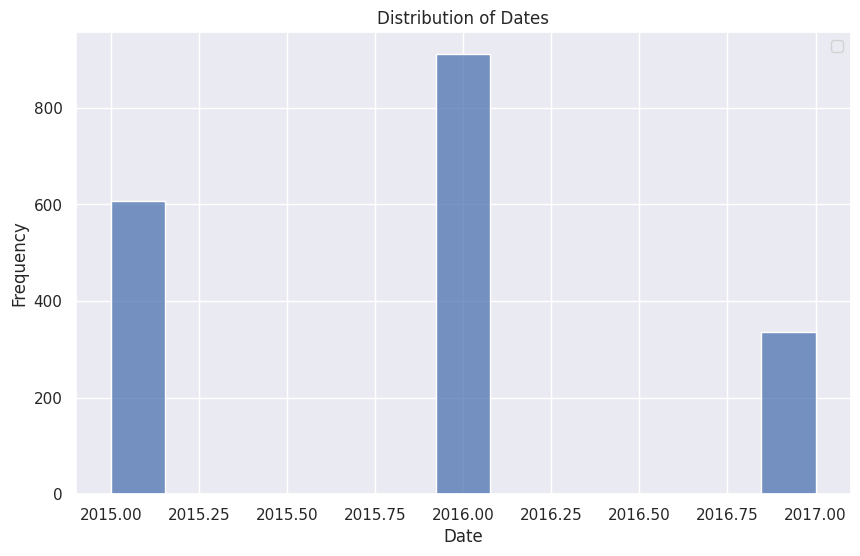

In [74]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(twitter_archive_master['timestamp'].dt.year)
plt.title('Distribution of Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()
plt.show()


#### Insights
1. 2016 has the highest numbers of tweets
2. 2017 has the lowest numbers of tweets


/tmp/ipykernel_13515/917502006.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


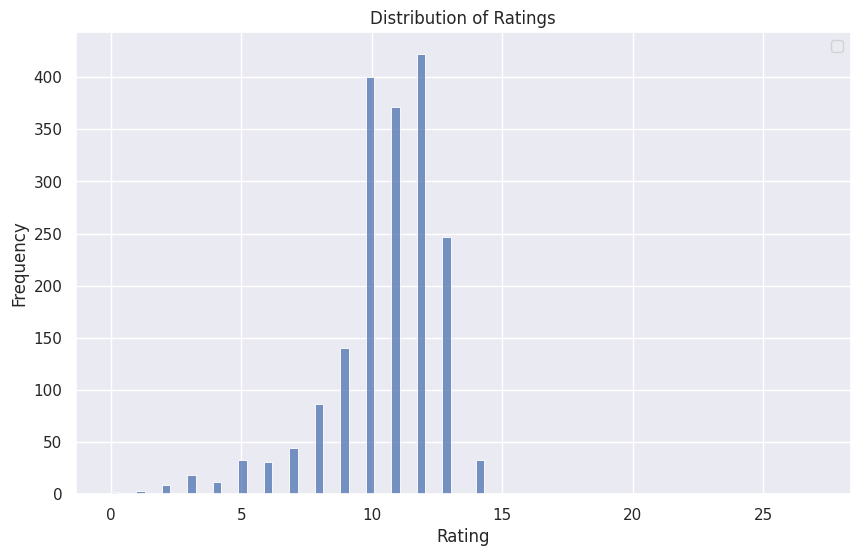

In [75]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(twitter_archive_master['rating_numerator'])
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()


#### Insights
1. Most of the ratings are more than 10


([<matplotlib.axis.XTick at 0x7c6b8a3a9b90>,
 [Text(2015, 0, '2015'), Text(2016, 0, '2016'), Text(2017, 0, '2017')])

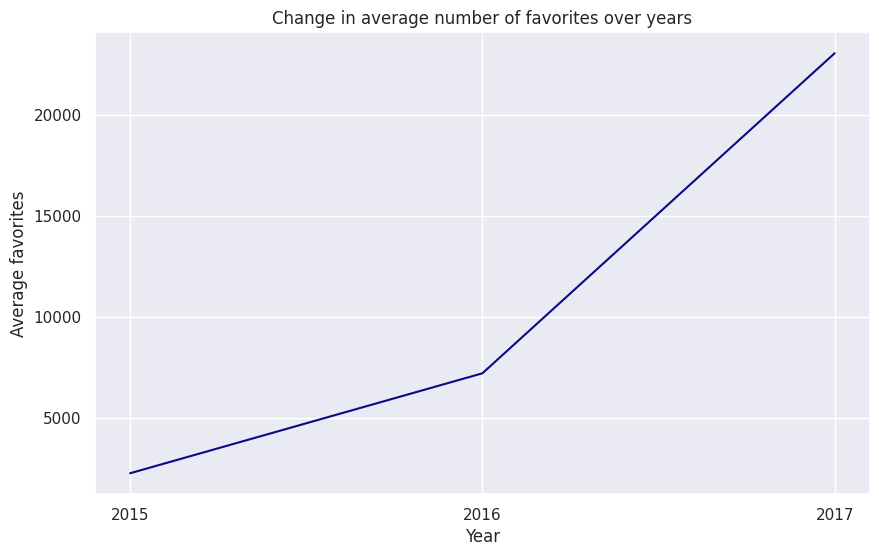

In [76]:

favorites_per_year = twitter_archive_master.groupby(twitter_archive_master['timestamp'].dt.year)['favorite_count'].mean()
favorites_per_year.plot(kind='line',colormap='plasma',figsize=(10,6))
plt.title('Change in average number of favorites over years')
plt.xlabel('Year')
plt.ylabel('Average favorites')
plt.xticks(favorites_per_year.index)

The average number of favorites per year has increased from 2015 to 2017, which means that the content is better